In [1]:
import sys, os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)

from explainability_analysis.crop_spectral_signature_analysis import *
from explainability_analysis.visualization_functions import *
from explainability_analysis.visualization_constants import *
from explainability_analysis.transformer_analysis import CLASSES_TO_EXCLUDE


import matplotlib.pyplot as plt
plt.rcParams.update(tex_fonts)
import seaborn as sns

figures_base_path = os.path.join(FIGURES_BASE_PATH, "appendix")

C:\Users\Ivica Obadic\PycharmProjects\EOExplainability


In [2]:
spectral_indices = get_dataset_spectral_indices()

Initializing BavarianCropsDataset train partition in holl
read 12 classes
precached dataset files found at C:/Users/datasets/BavarianCrops/npy\12_classes\blocks\holl\train
Dataset C:/Users/datasets/BavarianCrops/. region holl. partition train.X:20858x(71, 16), y:(20858,) with 12 classes
Initializing BavarianCropsDataset valid partition in holl
read 12 classes
precached dataset files found at C:/Users/datasets/BavarianCrops/npy\12_classes\blocks\holl\valid
Dataset C:/Users/datasets/BavarianCrops/. region holl. partition valid.X:3909x(144, 16), y:(3909,) with 12 classes
Initializing BavarianCropsDataset test partition in holl
read 12 classes
precached dataset files found at C:/Users/datasets/BavarianCrops/npy\12_classes\blocks\holl\test
Dataset C:/Users/datasets/BavarianCrops/. region holl. partition test.X:9583x(144, 16), y:(9583,) with 12 classes
Initializing BavarianCropsDataset train partition in krum
read 12 classes
precached dataset files found at C:/Users/datasets/BavarianCrops/np

In [4]:
spectral_indices_most_frequent_classes = spectral_indices.loc[~spectral_indices["Crop type"].isin(CLASSES_TO_EXCLUDE)]
spectral_indices_most_frequent_classes = spectral_indices_most_frequent_classes.groupby(["Date", "Crop type"])["NDVI"].mean().reset_index()

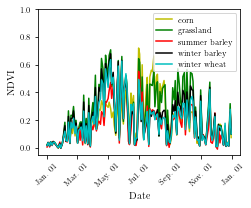

In [5]:
fig_width = set_size(260)[0]
fig, axs = plt.subplots(figsize=(fig_width, 3))
axs = sns.lineplot(data=spectral_indices_most_frequent_classes, x="Date", y="NDVI", hue="Crop type", estimator="mean",ci=None, ax = axs, palette=CROP_TYPE_COLOR_MAPPING)
axs.xaxis.set_major_formatter(DATE_FORMATTER)
axs.tick_params(axis='x', rotation=45)
axs.set_ylim(-0.05, 1)
axs.legend(loc="best")
fig.tight_layout()
plt.savefig(os.path.join(figures_base_path, 'ndvi_over_time.pdf'))
plt.savefig(os.path.join(figures_base_path, 'ndvi_over_time.png'))